<a href="https://colab.research.google.com/github/legendary-idiot/ARIMA_Model/blob/main/NO2_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install Prophet and Dependencies**

In [ ]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# **2. Data Import and Visualize**

In [3]:
df = pd.read_csv('/content/Pollutant_Data/Pollutant Data.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1095 non-null   object 
 1   SO2     1095 non-null   float64
 2   NO      1095 non-null   float64
 3   NO2     1095 non-null   float64
 4   NOx     1095 non-null   float64
 5   O3      1095 non-null   float64
 6   PM2.5   1095 non-null   float64
 7   PM10    1095 non-null   float64
dtypes: float64(7), object(1)
memory usage: 68.6+ KB


In [4]:
df.head()

,Date,SO2,NO,NO2,NOx,O3,PM2.5,PM10
0,1-Jan-21,2.0590,31.3940,19.0900,50.4840,11.7230,27.3530,112.4580
1,2-Jan-21,2.5045,38.0809,32.8662,72.0315,11.5146,51.8938,178.5706
2,3-Jan-21,2.9500,46.1920,56.5840,102.7760,11.3100,98.4525,283.5500
3,4-Jan-21,2.8667,35.8671,27.4246,58.8083,27.7379,71.7288,197.7121
4,5-Jan-21,2.9475,47.4900,29.2929,74.8042,22.7471,86.1671,195.8113


In [5]:
df.tail()

,Date,SO2,NO,NO2,NOx,O3,PM2.5,PM10
1090,27-Dec-23,7.4313,32.0225,8.9050,38.7013,2.5577,172.9479,233.7886
1091,28-Dec-23,5.4300,10.2100,17.9800,28.1900,2.5225,243.0800,311.2325
1092,29-Dec-23,5.1629,14.5946,10.6950,25.2896,2.5363,141.5100,228.3850
1093,30-Dec-23,4.8596,4.9267,8.9063,13.8329,2.5204,79.0046,150.1833
1094,31-Dec-23,4.6693,12.3886,9.1957,21.5843,2.5307,92.4479,147.1693


# **3. Select Data to Predict**

In [6]:
df=df[["Date","NO2"]]
df.head()

,Date,NO2
0,1-Jan-21,19.0900
1,2-Jan-21,32.8662
2,3-Jan-21,56.5840
3,4-Jan-21,27.4246
4,5-Jan-21,29.2929


**Change Column Names for FBProphet**

In [7]:
df.columns = ['ds','y']

**Convert Date Format to YY-MM-DD**

In [9]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1090,2023-12-27,8.9050
1091,2023-12-28,17.9800
1092,2023-12-29,10.6950
1093,2023-12-30,8.9063
1094,2023-12-31,9.1957


# **4. Start Making Predictions**

In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(df)

**Predictions for 1 Year (365 Days)**

In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1455,2024-12-26
1456,2024-12-27
1457,2024-12-28
1458,2024-12-29
1459,2024-12-30


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,25.114662,18.740536,31.326111
1,2021-01-02,25.939142,19.477452,32.174436
2,2021-01-03,26.282513,19.535118,32.739623
3,2021-01-04,26.852668,20.888382,33.175074
4,2021-01-05,27.519351,20.910577,33.897150


# **5. Plot the Predicted Data**

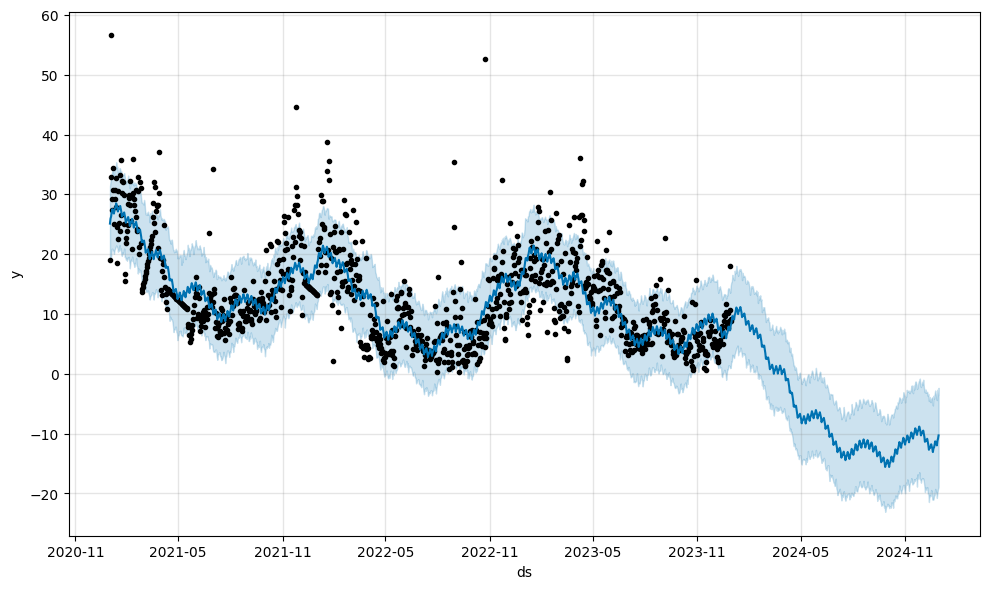

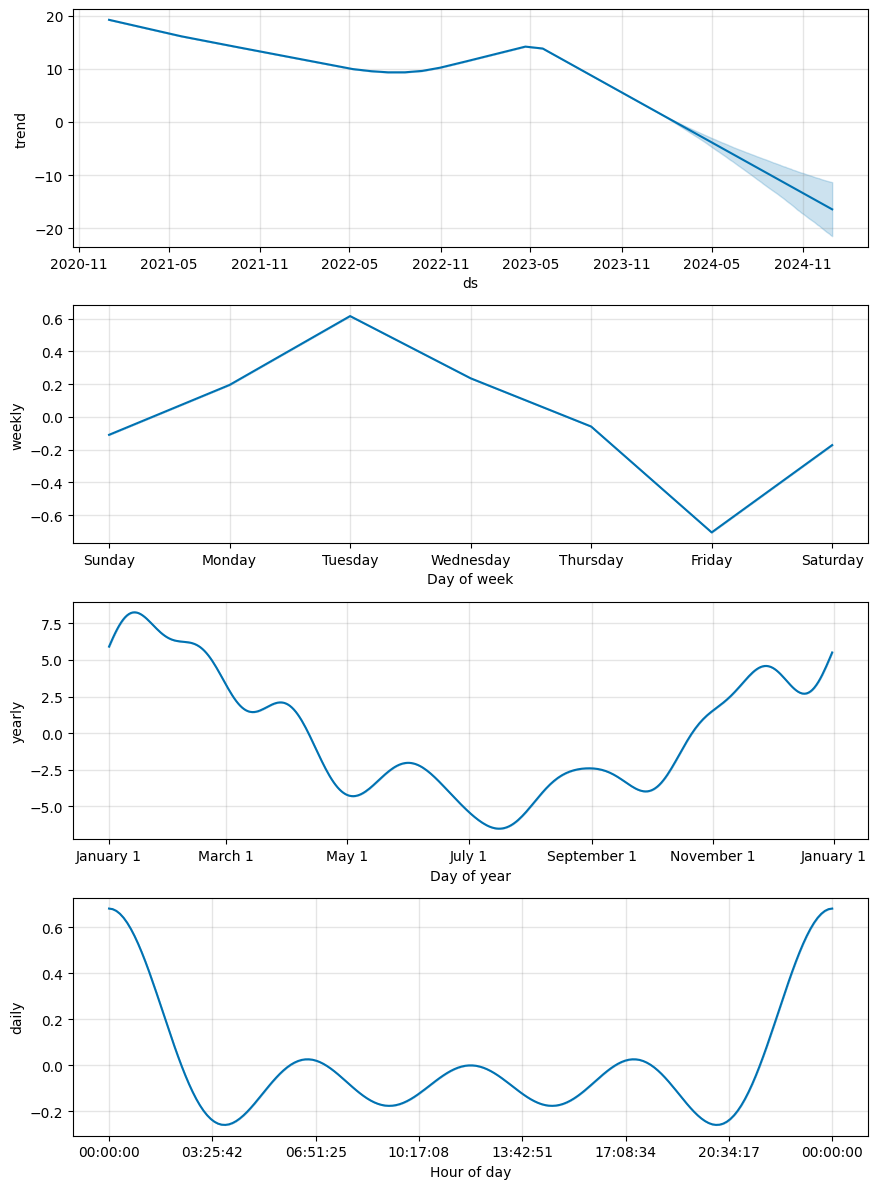

In [15]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

**Interactive Plot**

In [19]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# **6. Export the Predicted Data**

In [17]:
export = forecast[["ds", "yhat"]]
export.head()

,ds,yhat
0,2021-01-01,25.114662
1,2021-01-02,25.939142
2,2021-01-03,26.282513
3,2021-01-04,26.852668
4,2021-01-05,27.519351


In [20]:
export.to_csv('/content/Pollutant_Data/Predicted_NO2.csv')